In [41]:
import numpy as np

In [45]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas

In [5]:
cs_df = pandas.read_csv('couchsurfing/clean_hosts.csv')

def get_year(s):
    try:
        return datetime.datetime(int(s.split("Member since ")[1]), 1, 1)
    except:
        return None
    
cs_df['member_since'] = cs_df['member_since'].apply(get_year)

In [6]:
cs_df.head()

,_id,city,address_verify,country,education,hometown,language,last_login,member_since,occupation,...,phone_verify,profile_rate,references,response_rate,state,status,verified_status,member_since_int,references_int,convert_state
0,ObjectId(56de216cc1c31ade04679190),Wadley,Address Not Verified,United States,No education listed,No hometown listed,Fluent in English,Last login over 6 years ago,None,No occupation listed,...,Phone Not Verified,Profile 15% complete,0 references,NaN,AL,Accepting Guests,Not Verified,2009,0,Alabama
1,ObjectId(56de2170c1c31ade04679191),Adamsville,Address Not Verified,United States,No education listed,No hometown listed,No languages listed,Last login over 2 years ago,None,No occupation listed,...,Phone Not Verified,Profile 10% complete,0 references,NaN,AL,Accepting Guests,Not Verified,2013,0,Alabama
2,ObjectId(56de2170c1c31ade04679192),Graysville,Address Not Verified,United States,No education listed,No hometown listed,Fluent in English,Last login about 4 years ago,None,No occupation listed,...,Phone Not Verified,Profile 10% complete,0 references,NaN,AL,Maybe Accepting Guests,Not Verified,2012,0,Alabama
3,ObjectId(56de2177c1c31ade04679194),Abbeville,Address Not Verified,United States,No education listed,No hometown listed,Fluent in English,Last login over 3 years ago,None,No occupation listed,...,Phone Not Verified,Profile 10% complete,0 references,NaN,Alabama,Maybe Accepting Guests,Not Verified,2012,0,Alabama
4,ObjectId(56de2178c1c31ade04679195),Abbeville,Address Not Verified,United States,No education listed,From Abbeville,Fluent in English,Last login over 6 years ago,None,No occupation listed,...,Phone Not Verified,Profile 25% complete,0 references,NaN,Alabama,Accepting Guests,Not Verified,2009,0,Alabama


In [13]:
cs_df.columns

Index(['_id', 'city', 'address_verify', 'country', 'education', 'hometown', 'language', 'last_login', 'member_since', 'occupation', 'payment_verify', 'people_age', 'people_id', 'people_name', 'people_sex', 'phone_verify', 'profile_rate', 'references', 'response_rate', 'state', 'status', 'verified_status', 'member_since_int', 'references_int', 'convert_state'], dtype='object')

In [32]:
cs_df['last_login']

0      Last login over 6 years ago
1      Last login over 2 years ago
2     Last login about 4 years ago
3      Last login over 3 years ago
4      Last login over 6 years ago
5      Last login over 3 years ago
6      Last login over 6 years ago
7      Last login over 3 years ago
8      Last login over 3 years ago
9      Last login over 3 years ago
10     Last login over 6 years ago
11     Last login over 6 years ago
12     Last login over 6 years ago
13     Last login over 3 years ago
14     Last login over 6 years ago
...
1462660          Last login 6 months ago
1462661          Last login 5 months ago
1462662          Last login 6 months ago
1462663          Last login 7 months ago
1462664     Last login about 7 hours ago
1462665     Last login about 7 hours ago
1462666             Last login 1 day ago
1462667            Last login 2 days ago
1462668    Last login about 15 hours ago
1462669             Last login 1 day ago
1462670    Last login about 21 hours ago
1462671     Last log

In [11]:
cs_df['references'].value_counts()

0 references                           1351926
1  Reference 1Confirmed & Positive       23595
1  Reference                             22892
2  References 1Confirmed & Positive       6922
2  References 2Confirmed & Positive       6034
2  References                             4423
3  References 2Confirmed & Positive       3275
3  References 1Confirmed & Positive       2674
3  References 3Confirmed & Positive       2465
4  References 3Confirmed & Positive       1863
4  References 2Confirmed & Positive       1710
3  References                             1445
4  References 4Confirmed & Positive       1292
4  References 1Confirmed & Positive       1202
5  References 3Confirmed & Positive       1181
...
51  References 39Confirmed & Positive      1
221  References 187Confirmed & Positive    1
269  References 234Confirmed & Positive    1
82  References 72Confirmed & Positive      1
102  References 75Confirmed & Positive     1
92  References 39Confirmed & Positive      1
100  References 41Con

In [10]:
len(cs_df[cs_df['references_int']==0]) / len(cs_df)

0.9242832481583401

# 92% of cs profiles have 0 references!

In [113]:
def make_time_ago(s):
    time_ago = None
    num = None
    unit = None
    num_str, unit = s.split(' ')[-3:-1]
    try:
        num = int(num_str)
    except ValueError:
        if num_str  == 'a':
            num, unit = 1, 'minute'
        elif num_str == 'long':
            num, unit = 10, 'year'
    unit = unit[:-1] if unit.endswith('s') else unit
    if unit == 'year':
        time_ago = datetime.timedelta(days = num*365)
    elif unit == 'month':
        time_ago = datetime.timedelta(days = num*30)
    elif unit == 'day':
        time_ago = datetime.timedelta(days = num)
    elif unit == 'hour':
        time_ago = datetime.timedelta(hours = num)
    elif unit == 'minute':
        time_ago = datetime.timedelta(minutes = num)
    return time_ago.days

In [127]:
cs_hosts = cs_df[cs_df['status'] == 'Accepting Guests']

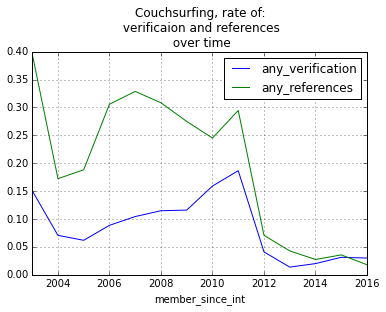

In [128]:
cs_df['any_verification'] = cs_df['verified_status'].apply(lambda x: x != 'Not Verified')
cs_df['any_references'] = cs_df['references_int'].apply(lambda x: int(x != 0))
any_ver_ref = cs_df[['member_since_int','any_verification','any_references']].groupby(by='member_since_int').aggregate(np.mean)
any_ver_ref.plot(title='Couchsurfing, rate of: \n verificaion and references \n over time')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


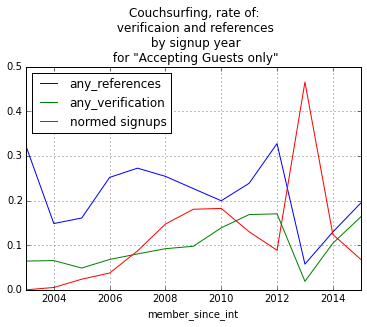

In [148]:
cs_hosts['any_verification'] = cs_hosts['verified_status'].apply(lambda x: x != 'Not Verified')
cs_hosts['any_references'] = cs_hosts['references_int'].apply(lambda x: int(x != 0))
any_ver_ref_hosts = cs_hosts[['member_since_int','any_verification','any_references','people_id']].groupby(
        by='member_since_int').aggregate(
        {'any_verification':np.mean, 'any_references':np.mean, 'people_id':lambda x: len(x)/160000})
any_ver_ref_hosts.columns = ['% any_references','% any_verification','normed signups']
any_ver_ref_hosts.ix[2003:2015].plot(title='Couchsurfing, rate of: \n verificaion and references \n by signup year \n for "Accepting Guests only"')

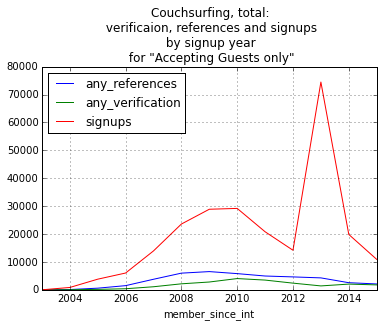

In [154]:
any_ver_ref_hosts_total = cs_hosts[['member_since_int','any_verification','any_references','people_id']].groupby(
    by='member_since_int').aggregate(
    {'any_verification':sum, 'any_references':sum, 'people_id':len})
any_ver_ref_hosts_total.columns = ['any_references','any_verification','signups']
any_ver_ref_hosts_total.ix[2003:2015].plot(title='Couchsurfing, total: \n verificaion, references and signups\n by signup year \n for "Accepting Guests only"')

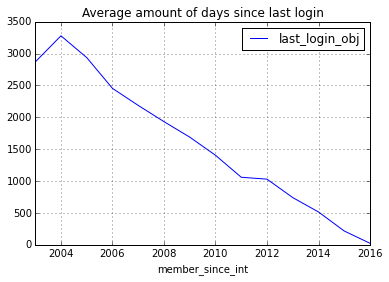

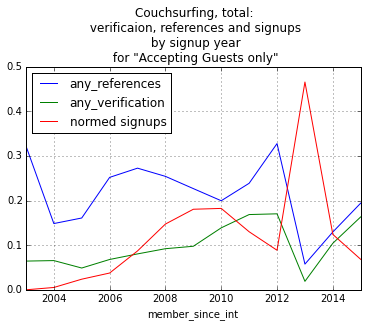

In [151]:
cs_df['last_login_days'] = cs_df['last_login'].apply(make_time_ago)
last_login = cs_df[['member_since_int','last_login_obj']].groupby(by='member_since_int').aggregate(np.mean)
last_login.plot(title='Average amount of days since last login')


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


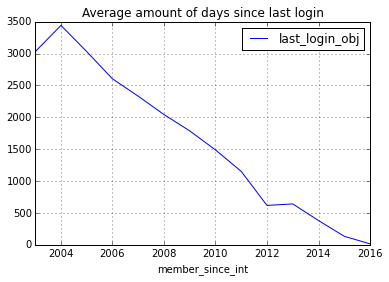

In [133]:
cs_hosts['last_login_days'] = cs_hosts['last_login'].apply(make_time_ago)
last_login_hosts = cs_hosts[['member_since_int','last_login_obj']].groupby(by='member_since_int').aggregate(np.mean)
last_login_hosts.plot(title='Average amount of days since last login')

In [12]:
ab_df = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','number_of_reviews'])

In [18]:
ab_df['number_of_reviews'].value_counts()

0     113052
1      37590
2      22946
3      16491
4      12912
5      10375
6       8894
7       7665
8       6873
9       6159
10      5345
11      4939
12      4460
13      4009
14      3712
...
458    1
314    1
453    1
318    1
452    1
415    1
414    1
323    1
324    1
448    1
417    1
328    1
441    1
333    1
307    1
Length: 388, dtype: int64

In [19]:
len(ab_df[ab_df['number_of_reviews']==0]) / len(ab_df)

0.3352539789391275